# **YIELD PREDICTION MODE**

In [1]:
# Including Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.linear_model import Ridge, LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.pipeline import make_pipeline

# **Loading Dataset**

In [2]:
#importing Dataset
data = pd.read_csv("/kaggle/input/crop-yield-of-a-farm/crop_yield_data.csv")

In [3]:
data.head(3)

,rainfall_mm,soil_quality_index,farm_size_hectares,sunlight_hours,fertilizer_kg,crop_yield
0,1626,9,636,11,1006,404
1,1959,9,73,11,112,115
2,1360,1,352,5,702,231


# **Exploring dataset**

In [4]:
data.shape

(3000, 6)

In [5]:
data.head(5)

,rainfall_mm,soil_quality_index,farm_size_hectares,sunlight_hours,fertilizer_kg,crop_yield
0,1626,9,636,11,1006,404
1,1959,9,73,11,112,115
2,1360,1,352,5,702,231
3,1794,2,948,7,299,537
4,1630,5,884,5,2733,554


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype
---  ------              --------------  -----
 0   rainfall_mm         3000 non-null   int64
 1   soil_quality_index  3000 non-null   int64
 2   farm_size_hectares  3000 non-null   int64
 3   sunlight_hours      3000 non-null   int64
 4   fertilizer_kg       3000 non-null   int64
 5   crop_yield          3000 non-null   int64
dtypes: int64(6)
memory usage: 140.8 KB


In [7]:
data.isnull().sum()

rainfall_mm           0
soil_quality_index    0
farm_size_hectares    0
sunlight_hours        0
fertilizer_kg         0
crop_yield            0
dtype: int64

In [8]:
data.describe()

,rainfall_mm,soil_quality_index,farm_size_hectares,sunlight_hours,fertilizer_kg,crop_yield
count,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000
mean,1263.095000,5.506667,498.801000,7.995333,1549.450333,328.099000
std,432.371756,2.855172,287.122742,2.621501,814.326919,145.036503
min,500.000000,1.000000,10.000000,4.000000,100.000000,46.000000
25%,896.000000,3.000000,242.000000,6.000000,869.750000,199.000000
50%,1277.000000,6.000000,505.000000,8.000000,1542.000000,332.000000
75%,1636.000000,8.000000,741.000000,10.000000,2225.000000,455.000000
max,2000.000000,10.000000,1000.000000,12.000000,3000.000000,628.000000


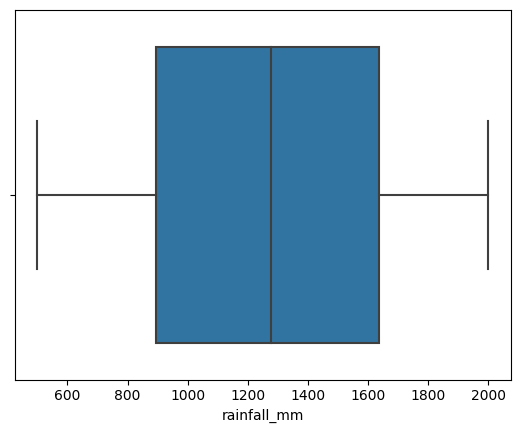

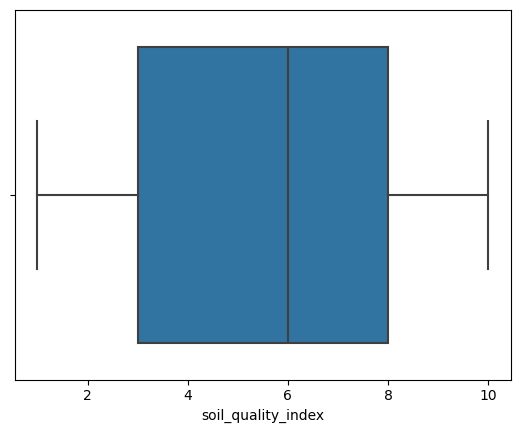

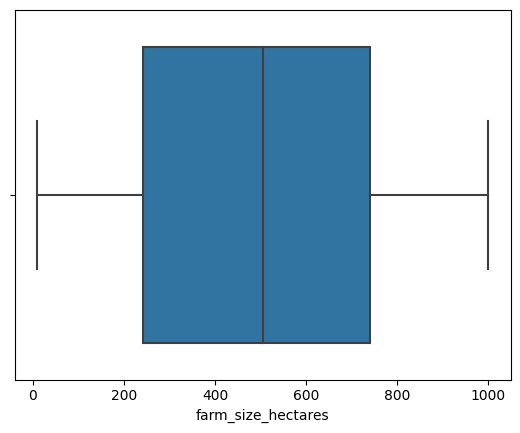

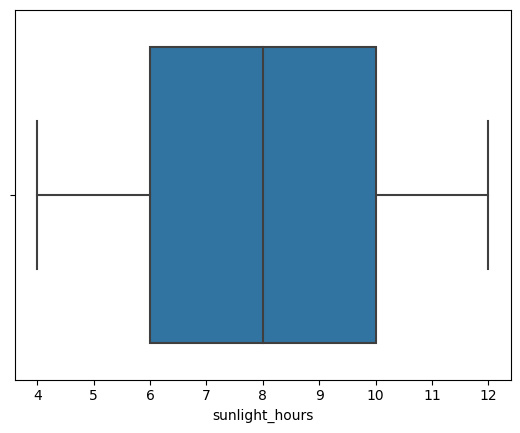

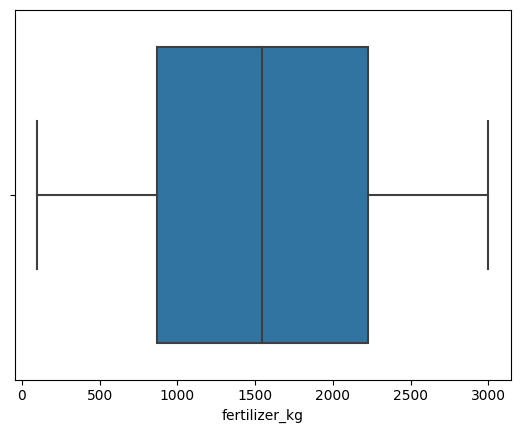

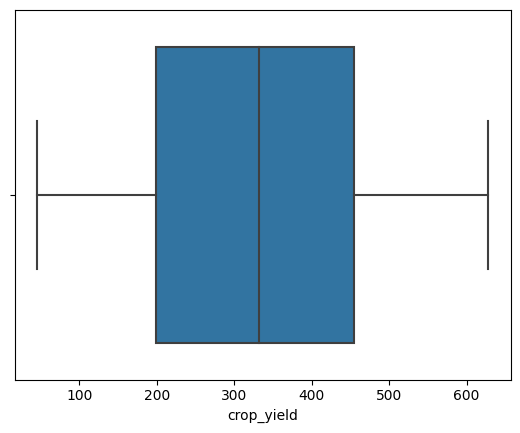

In [9]:
#Checking for Outliers
for i in data.select_dtypes(include= "number").columns:
    sns.boxplot(data=data, x=i)
    plt.show()

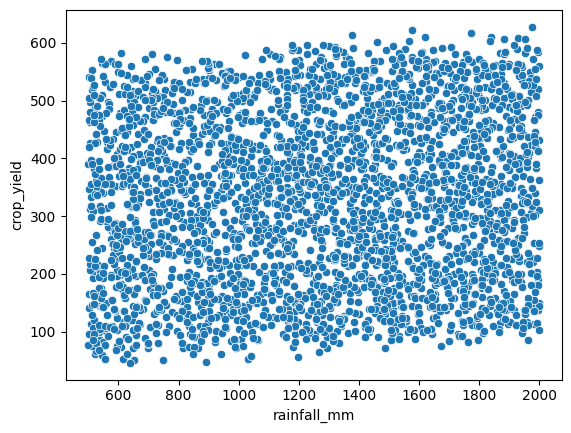

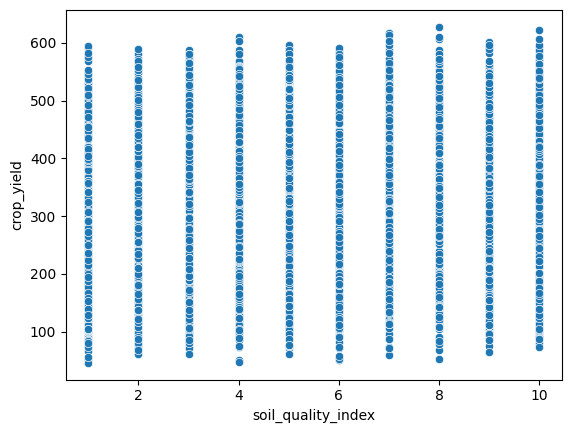

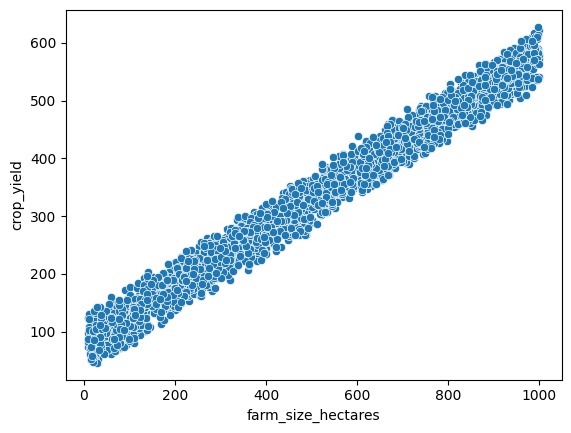

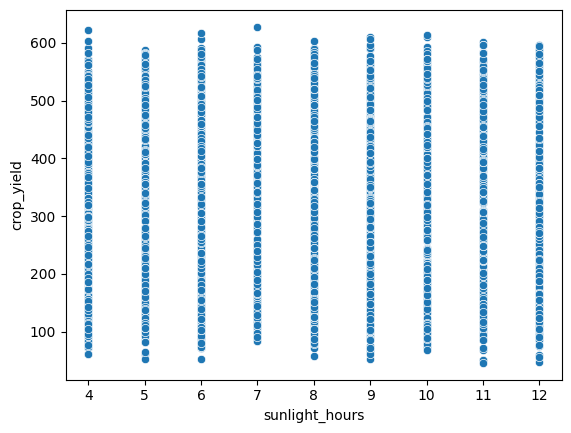

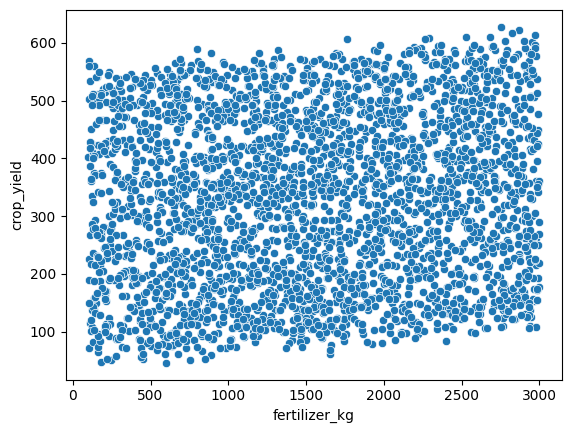

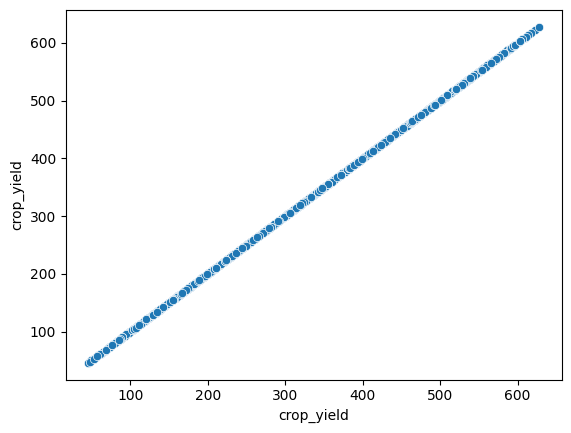

In [10]:
#checking for correlation
for i in data.select_dtypes(include="number").columns:
    sns.scatterplot(data=data, x=i, y=data["crop_yield"])
    plt.show()

# **Building Regression model**

**Split Dataset into train and test dataset**

In [11]:
len(data)

3000

In [12]:
cut_off= int(len(data)*0.7)
train_data= data[:cut_off]
test_data=data[cut_off:]


In [13]:
train_data.shape

(2100, 6)

In [14]:
test_data.shape

(900, 6)

In [15]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2100 entries, 0 to 2099
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype
---  ------              --------------  -----
 0   rainfall_mm         2100 non-null   int64
 1   soil_quality_index  2100 non-null   int64
 2   farm_size_hectares  2100 non-null   int64
 3   sunlight_hours      2100 non-null   int64
 4   fertilizer_kg       2100 non-null   int64
 5   crop_yield          2100 non-null   int64
dtypes: int64(6)
memory usage: 98.6 KB


In [16]:
#Splitting train dataset
feature_matrix= ["rainfall_mm","farm_size_hectares","soil_quality_index", "fertilizer_kg"]
target_matrix= "crop_yield"
X_train=train_data[feature_matrix]
y_train=train_data[target_matrix]

In [17]:
X_train.head()

,rainfall_mm,farm_size_hectares,soil_quality_index,fertilizer_kg
0,1626,636,9,1006
1,1959,73,9,112
2,1360,352,1,702
3,1794,948,2,299
4,1630,884,5,2733


In [18]:
y_train.head()

0    404
1    115
2    231
3    537
4    554
Name: crop_yield, dtype: int64

# **Baseline model**

In [19]:
#baseline model
y_mean= y_train.mean().round(2)
baselin_model= [y_mean]*len(y_train)
print("Mean Yield", y_mean)
print("Baseline model Prediction",baselin_model[:5])

Mean Yield 327.01
Baseline model Prediction [327.01, 327.01, 327.01, 327.01, 327.01]


In [20]:
#mean absolute error for baseline model
baseline_model_MAE = mean_absolute_error(baselin_model,y_train).round(2)
print("Mean Absolute error of Baseline Model = ",baseline_model_MAE )

Mean Absolute error of Baseline Model =  124.97


# **Building the model**

In [21]:
#model
model = Ridge()

In [22]:
model.fit(X_train, y_train)

Ridge()

# **Make Prediction on Train data**

In [23]:
#making predcition and checking the accuracy
model_pred = model.predict(X_train).round(2)
model_pred_MAE = mean_absolute_error(model_pred, y_train)
print("Prediction on Train data",model_pred[:5])
print("Prediction MAE",model_pred_MAE)

Prediction on Train data [403.69 114.3  231.65 536.58 554.35]
Prediction MAE 0.31769047619047647


# **Make Prediction on Test data**

In [24]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 900 entries, 2100 to 2999
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype
---  ------              --------------  -----
 0   rainfall_mm         900 non-null    int64
 1   soil_quality_index  900 non-null    int64
 2   farm_size_hectares  900 non-null    int64
 3   sunlight_hours      900 non-null    int64
 4   fertilizer_kg       900 non-null    int64
 5   crop_yield          900 non-null    int64
dtypes: int64(6)
memory usage: 42.3 KB


In [25]:
#Splitting test dataset
feature_matrix= ["rainfall_mm","farm_size_hectares","soil_quality_index", "fertilizer_kg"]
target_matrix= "crop_yield"
X_test=test_data[feature_matrix]
y_test=test_data[target_matrix]

In [26]:
model_pred = model.predict(X_test).round(2)
model_pred_MAE = mean_absolute_error(model_pred, y_test)
print("Prediction on Train data",model_pred[:5])
print("Prediction MAE",model_pred_MAE)

Prediction on Train data [388.05 187.84 385.92 320.65 354.04]
Prediction MAE 0.2996222222222212


# **Deployment**

In [27]:
def make_prediction(rainfall_mm, farm_size_hectares,soil_quality_index,fertilizer_kg):
    data={
        "rainfall_mm": rainfall_mm,
        "farm_size_hectares": farm_size_hectares,
        "soil_quality_index": soil_quality_index,
        "fertilizer_kg": fertilizer_kg
    }
    file = pd.DataFrame(data, index=[0])
    prediction= model.predict(file).round(2)[0]
    return f"Predicted Agricultural Yield:{prediction}"


In [31]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype
---  ------              --------------  -----
 0   rainfall_mm         3000 non-null   int64
 1   soil_quality_index  3000 non-null   int64
 2   farm_size_hectares  3000 non-null   int64
 3   sunlight_hours      3000 non-null   int64
 4   fertilizer_kg       3000 non-null   int64
 5   crop_yield          3000 non-null   int64
dtypes: int64(6)
memory usage: 140.8 KB


In [34]:
#variables(rainfall_mm,farm_size_hectares,soil_quality_index,fertilizer_kg)
make_prediction(1500,300,9,1200)

'Predicted Agricultural Yield:235.8'

In [ ]:
data.